In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns


In [3]:
cus_data = pd.read_csv('Customers.csv')
cus_data.head()

CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

In [4]:
pro_data = pd.read_csv('Products.csv')
pro_data.head()

ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

In [5]:
trans_data = pd.read_csv('Transactions.csv')
trans_data.head()

TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68

In [6]:
region_counts = cus_data['Region'].value_counts()
region_counts

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

In [7]:
import plotly.express as px
region_coords = {
    'Asia': [34.0479, 100.6197],
    'Europe': [54.5260, 15.2551],
    'North America': [54.5260, -105.2551],
    'South America': [-14.2350, -51.9253],
    'Africa': [1.6508, 10.2679],
    'Australia': [-25.2744, 133.7751]
}

region_data = pd.DataFrame(list(region_counts.items()), columns=['Region', 'region_counts'])

region_data['Latitude'] = region_data['Region'].map(lambda x: region_coords[x][0])
region_data['Longitude'] = region_data['Region'].map(lambda x: region_coords[x][1])

fig = px.scatter_geo(
    region_data,
    lat='Latitude',
    lon='Longitude',
    text='Region',  
    size='region_counts',  
    size_max=50, 
    title='Bubble Map of Region Counts',
    projection='natural earth',  
)

fig.update_traces(marker=dict(opacity=0.6, line=dict(width=1, color='black')))
fig.update_layout(title_font_size=24)

fig.show()

In [58]:
cus_data['SignupDate'] = pd.to_datetime(cus_data['SignupDate'])
signup_trends = cus_data['SignupDate'].value_counts().sort_index()
signup_trends

SignupDate
2022-01-22    1
2022-02-02    1
2022-02-10    1
2022-02-13    2
2022-02-19    1
             ..
2024-11-13    2
2024-11-15    1
2024-11-18    1
2024-11-22    2
2024-12-28    1
Name: count, Length: 179, dtype: int64

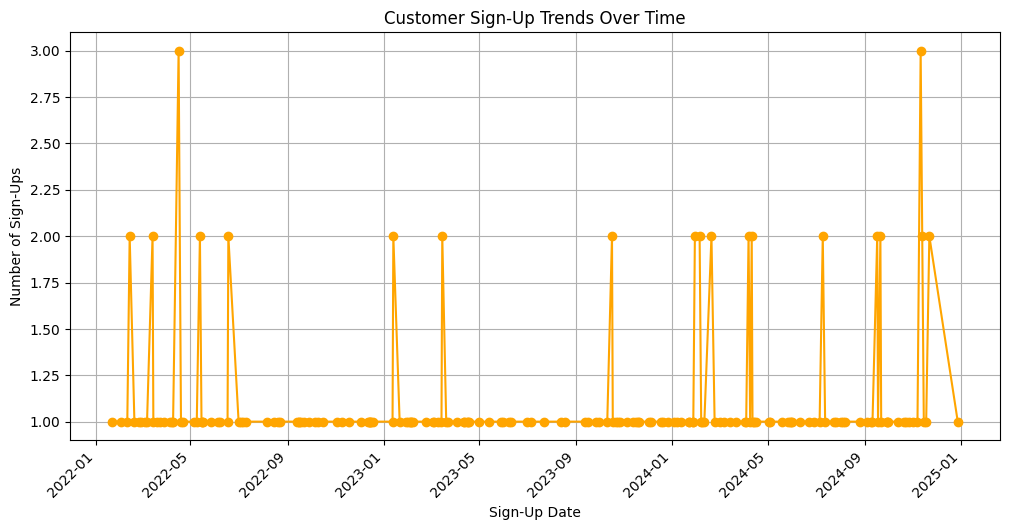

In [59]:
plt.figure(figsize=(12, 6))
signup_trends.plot(kind='line', marker='o', color='orange')
plt.title('Customer Sign-Up Trends Over Time')
plt.xlabel('Sign-Up Date')
plt.ylabel('Number of Sign-Ups')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [60]:
cat_counts = pro_data['Category'].value_counts()
cat_counts

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

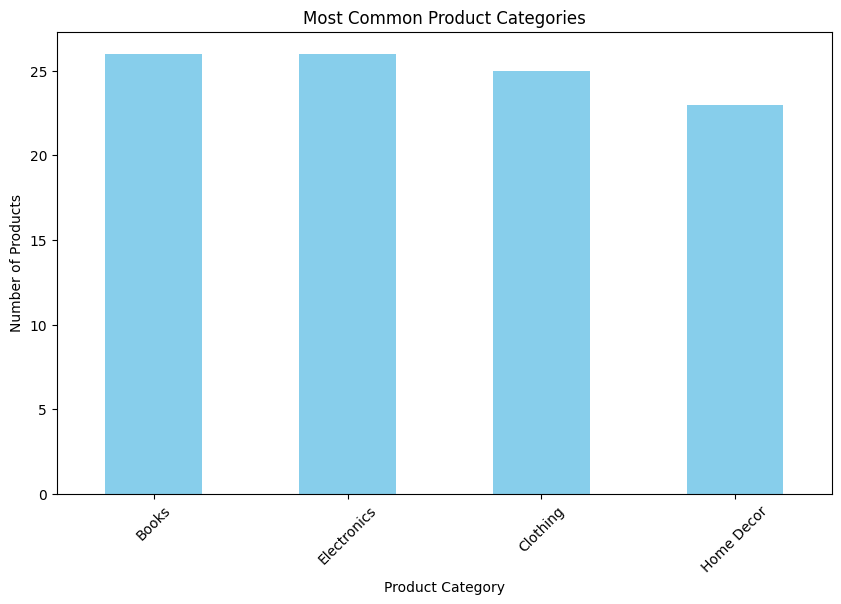

In [61]:
plt.figure(figsize = (10,6))
cat_counts.plot(kind = 'bar' , color = 'skyblue')
plt.title('Most Common Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()
plt.show()

In [62]:
pro_data['Price'].describe()

count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64

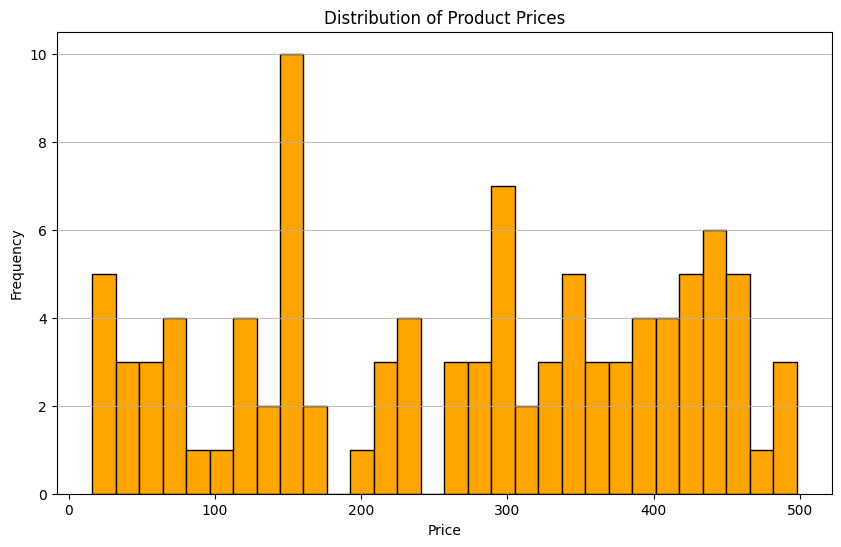

In [63]:
plt.figure(figsize=(10, 6))
plt.hist(pro_data['Price'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [64]:
category_price_stats = pro_data.groupby('Category')['Price'].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()
print(category_price_stats)

      Category        mean  median    min     max  count
0        Books  292.212308  337.94  33.59  497.76     26
1     Clothing  263.720000  303.50  18.82  481.78     25
2  Electronics  275.353462  282.72  16.08  459.86     26
3   Home Decor  235.020000  235.58  41.18  454.53     23


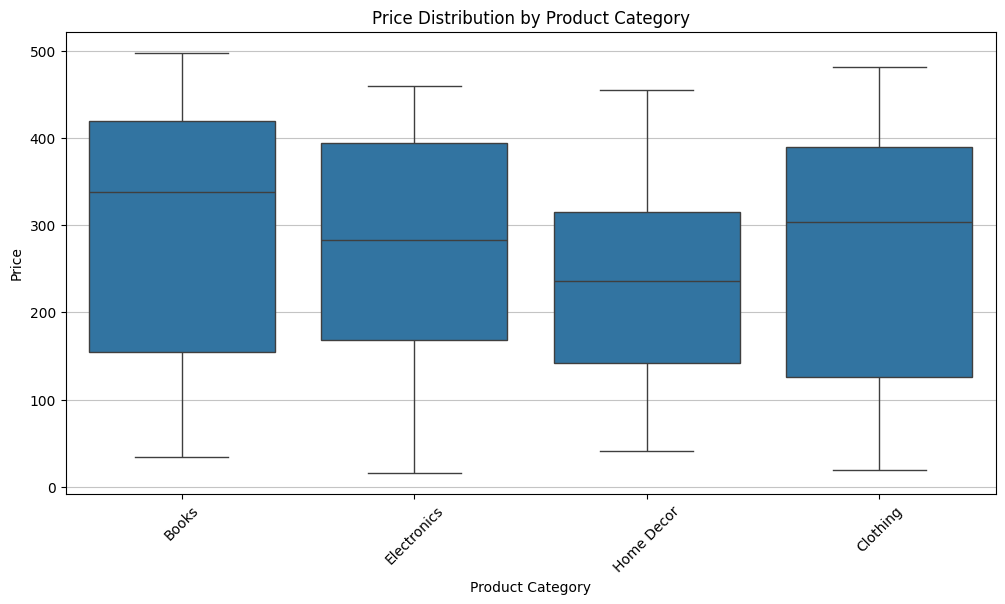

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=pro_data)
plt.title('Price Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [66]:
pro_data['ProductName'].value_counts()

ProductName
ActiveWear Smartwatch          4
SoundWave Headphones           4
HomeSense T-Shirt              3
TechPro T-Shirt                3
ActiveWear Jacket              3
                              ..
HomeSense Bluetooth Speaker    1
BookWorld Running Shoes        1
HomeSense Cookware Set         1
BookWorld Cookware Set         1
SoundWave Laptop               1
Name: count, Length: 66, dtype: int64

In [67]:
trans_data['TransactionDate'] = pd.to_datetime(trans_data['TransactionDate'])
trans_data['day'] = trans_data['TransactionDate'].dt.date
trans_data['month'] = trans_data['TransactionDate'].dt.to_period('M')

daily_transactions = trans_data['day'].value_counts().sort_index()

monthly_transactions = trans_data['month'].value_counts().sort_index()

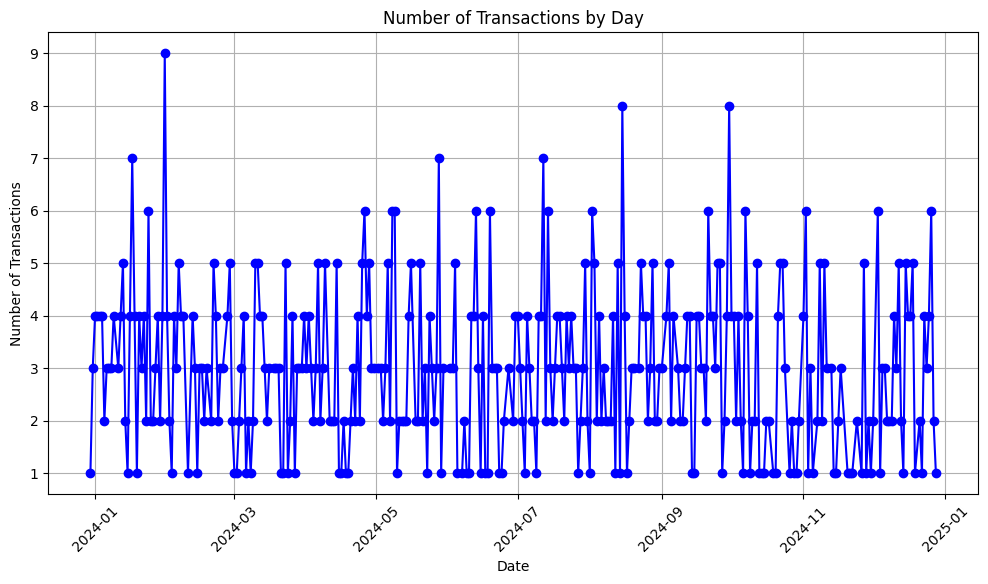

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
daily_transactions.plot(kind='line', marker='o', color='blue')
plt.title('Number of Transactions by Day')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid()
plt.show()

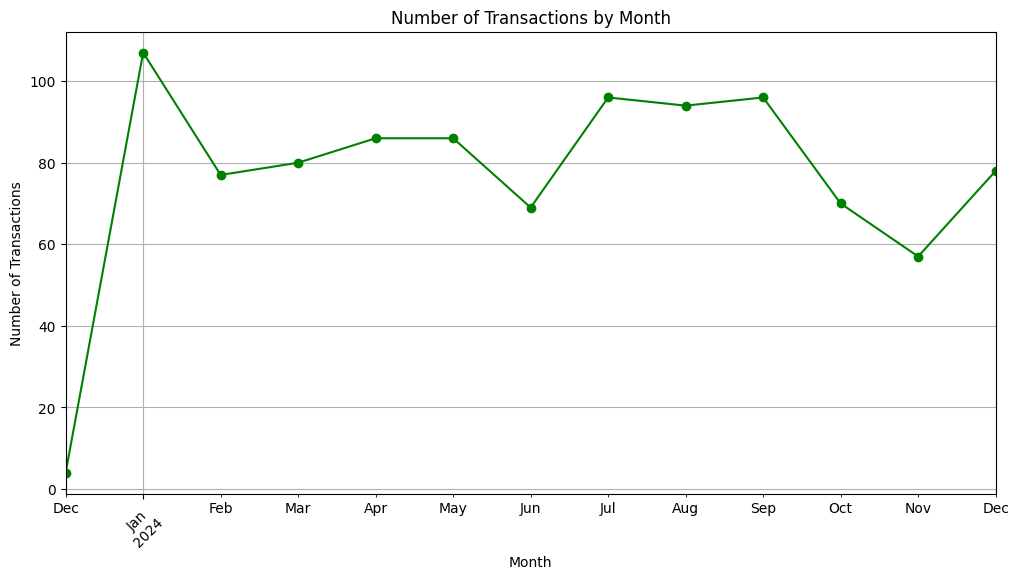

In [69]:
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='line', marker='o', color='green')
plt.title('Number of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [70]:
trans_data['TotalValue'] = trans_data['Quantity'] * trans_data['Price']
daily_summary = trans_data.groupby('day').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
high_value_transactions = trans_data[trans_data['TotalValue'] > trans_data['TotalValue'].quantile(0.95)]
print("High-Value Transactions:")
print(high_value_transactions)

High-Value Transactions:
    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
74         T00007      C0173      P023 2024-05-06 18:05:22         4   
82         T00997      C0164      P023 2024-11-01 23:04:56         4   
118        T00012      C0091      P041 2024-03-29 01:28:17         4   
119        T00034      C0168      P041 2024-01-09 11:00:50         4   
120        T00094      C0012      P041 2024-07-14 19:37:54         4   
125        T00482      C0066      P041 2024-06-04 02:02:24         4   
181        T00020      C0153      P007 2024-07-16 22:33:47         4   
182        T00163      C0101      P007 2024-03-13 22:33:34         4   
262        T00069      C0021      P086 2024-01-13 00:48:20         4   
263        T00193      C0041      P086 2024-06-10 11:46:13         4   
264        T00420      C0057      P086 2024-07-31 21:34:31         4   
265        T00493      C0126      P086 2024-11-28 19:01:58         4   
266        T00587      C0165      P086 

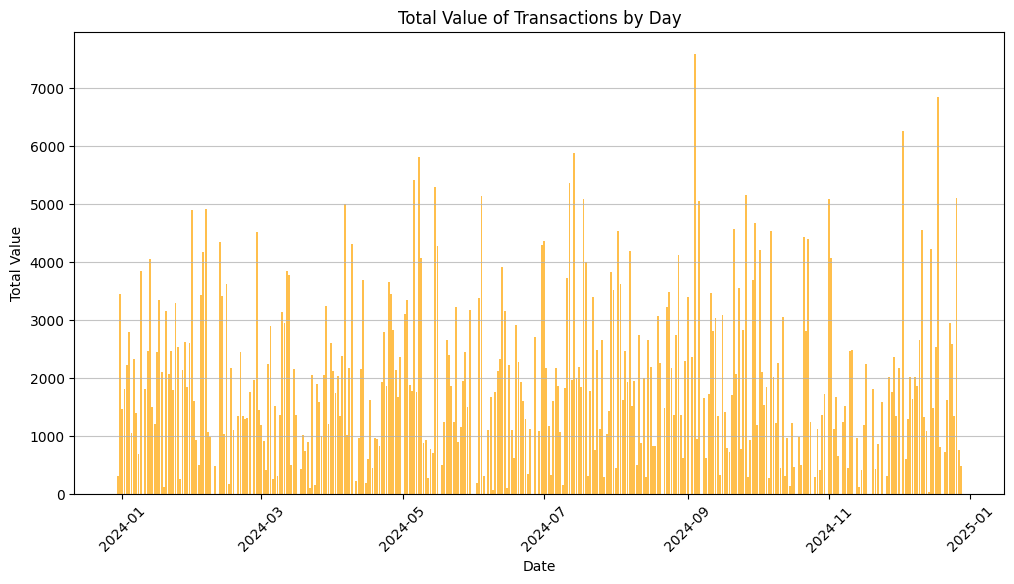

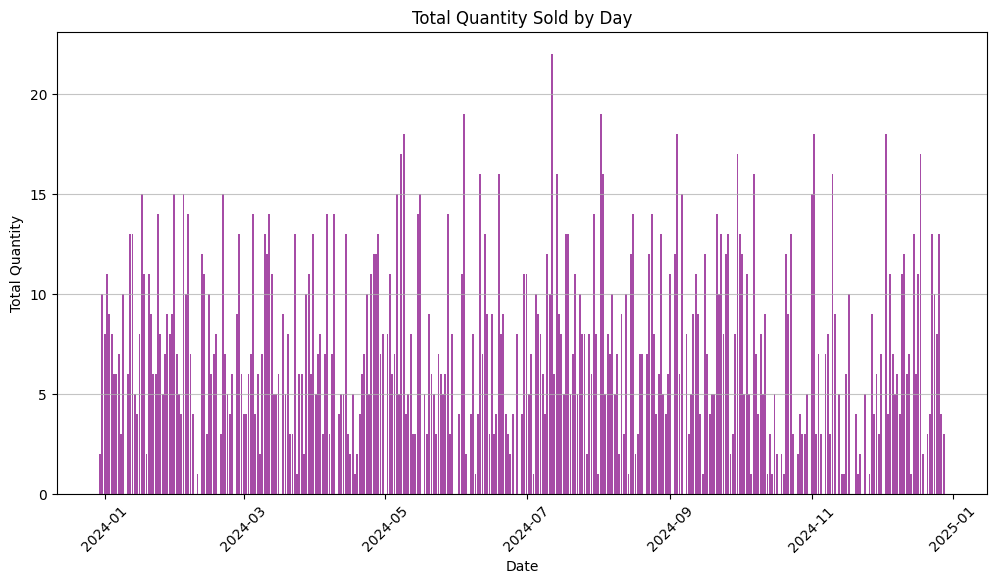

In [71]:
#bar plot for total value by day
plt.figure(figsize=(12, 6))
plt.bar(daily_summary['day'], daily_summary['TotalValue'], color='orange', alpha=0.7)
plt.title('Total Value of Transactions by Day')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

#bar plot for total quantity by day
plt.figure(figsize=(12, 6))
plt.bar(daily_summary['day'], daily_summary['Quantity'], color='purple', alpha=0.7)
plt.title('Total Quantity Sold by Day')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [72]:
merged_df = pro_data.merge(trans_data , how = 'right')
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
total_value_by_day_category = (
    merged_df.groupby([merged_df['TransactionDate'].dt.date, 'Category'])['TotalValue']
    .sum()
    .reset_index()
    .rename(columns={'TransactionDate': 'Date'})
)
print(total_value_by_day_category.head())


         Date     Category  TotalValue
0  2023-12-30   Home Decor      313.92
1  2023-12-31     Clothing     1585.36
2  2023-12-31  Electronics     1870.24
3  2024-01-01        Books      147.95
4  2024-01-01     Clothing      366.07


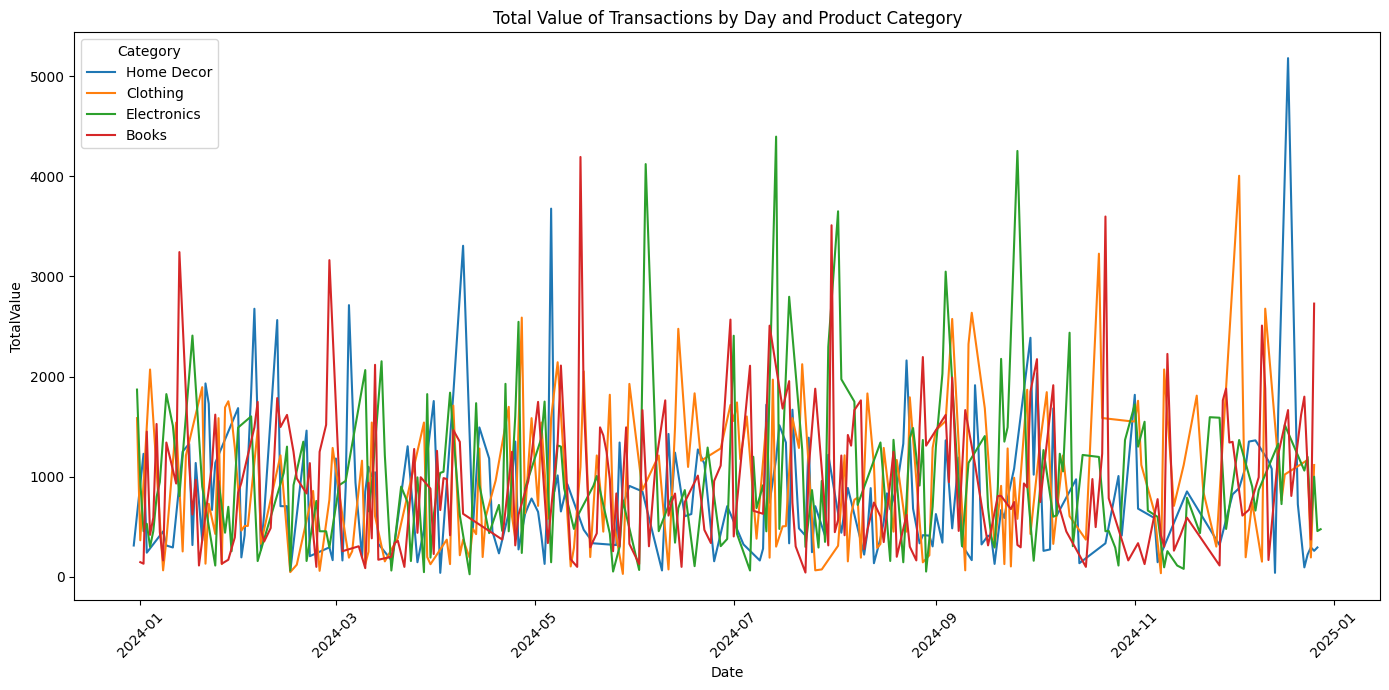

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.lineplot(data=total_value_by_day_category, x='Date', y='TotalValue', hue='Category')
plt.title('Total Value of Transactions by Day and Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [74]:
total_quantity_by_day_category = (
    merged_df.groupby([merged_df['TransactionDate'].dt.date, 'Category'])['Quantity']
    .sum()
    .reset_index()
    .rename(columns={'TransactionDate': 'Date'})
)
print(total_quantity_by_day_category.head())


         Date     Category  Quantity
0  2023-12-30   Home Decor         2
1  2023-12-31     Clothing         4
2  2023-12-31  Electronics         6
3  2024-01-01        Books         1
4  2024-01-01     Clothing         1


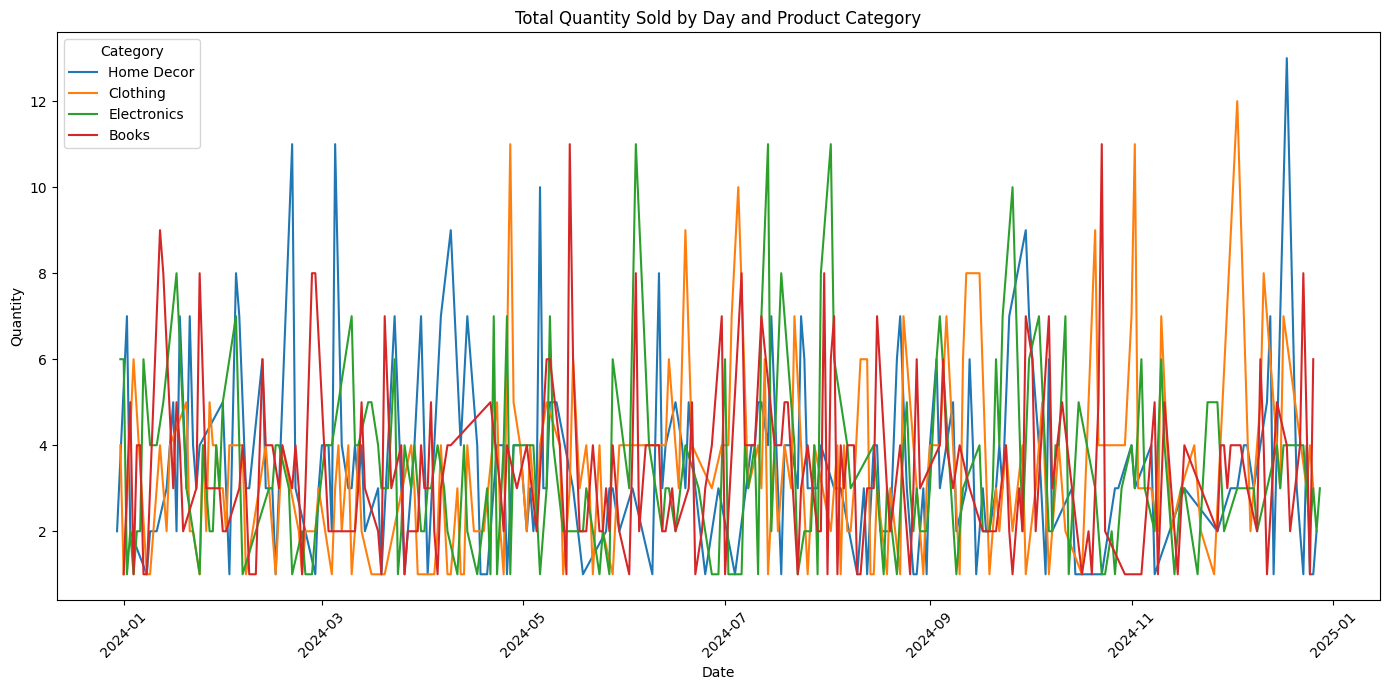

In [75]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=total_quantity_by_day_category, x='Date', y='Quantity', hue='Category')
plt.title('Total Quantity Sold by Day and Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [76]:
top_products_by_category = (
    merged_df.groupby(['Category', 'ProductName'])[['TotalValue', 'Quantity']]
    .sum()
    .reset_index()
    .sort_values(by=['Category', 'TotalValue'], ascending=[True, False])
)

print(top_products_by_category)


      Category                 ProductName  TotalValue  Quantity
10       Books             SoundWave Novel    24507.90        58
4        Books          BookWorld Cookbook    19221.99        48
14       Books            TechPro Textbook    18267.96        62
12       Books            TechPro Cookbook    17905.20        43
2        Books         ActiveWear Textbook    17257.86        58
..         ...                         ...         ...       ...
52  Home Decor      BookWorld Cookware Set     4317.94        19
55  Home Decor  ComfortLiving Cookware Set     4301.91        27
53  Home Decor               BookWorld Rug     1722.42        18
56  Home Decor     ComfortLiving Desk Lamp     1694.16        26
57  Home Decor           ComfortLiving Rug     1063.81        19

[66 rows x 4 columns]


In [77]:
trans_cus = pd.merge(trans_data, cus_data, on='CustomerID', how='left')
merged_data = pd.merge(trans_cus, pro_data, on='ProductID', how='left')
print(merged_data.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x         day    month     CustomerName         Region  \
0      300.68   300.68  2024-08-25  2024-08   Andrea Jenkins         Europe   
1      300.68   300.68  2024-05-27  2024-05  Brittany Harvey           Asia   
2      300.68   300.68  2024-04-25  2024-04  Kathryn Stevens         Europe   
3      601.36   300.68  2024-03-26  2024-03  Travis Campbell  South America   
4      902.04   300.68  2024-03-21  2024-03    Timothy Perez         Europe   

  SignupDate                      ProductName     Category  Price_y  
0 2022-12-03  ComfortLiving Blueto

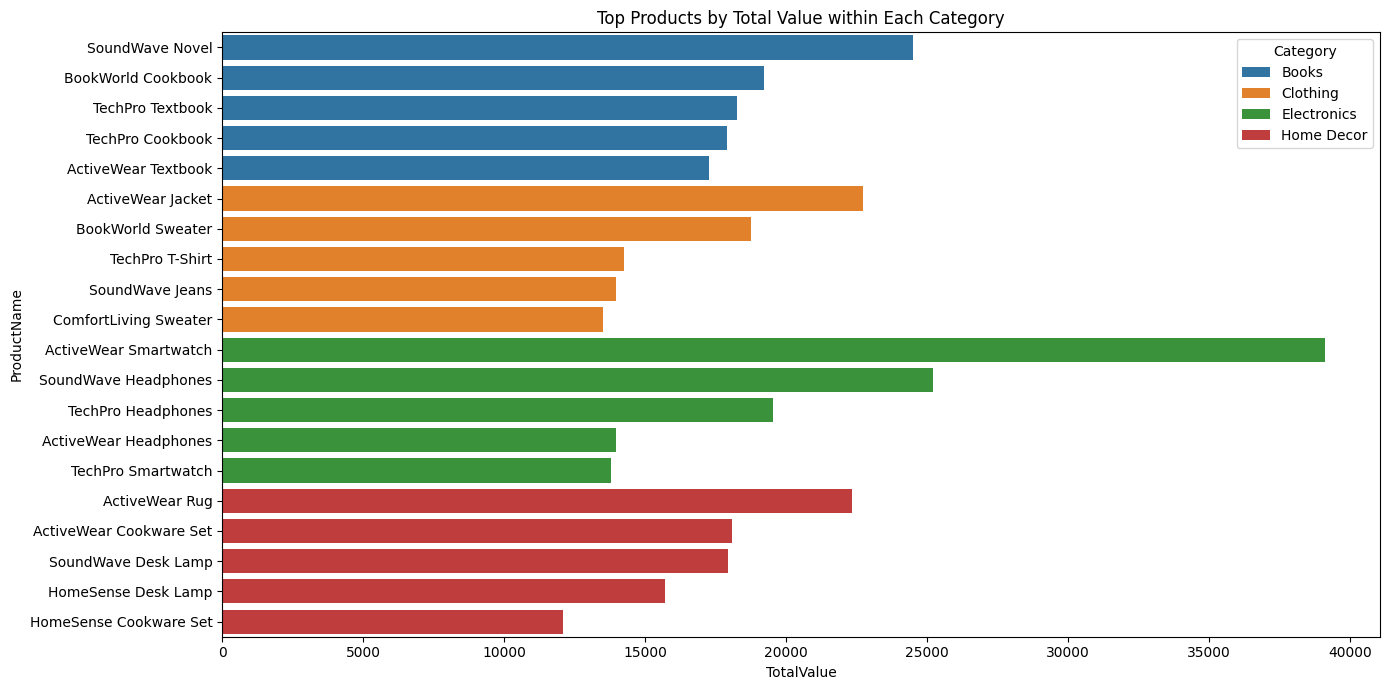

In [78]:
plt.figure(figsize=(14, 7))
sns.barplot(
    data=top_products_by_category.groupby('Category').head(5), 
    x='TotalValue', 
    y='ProductName', 
    hue='Category', 
    dodge=False
)
plt.title('Top Products by Total Value within Each Category')
plt.tight_layout()
plt.show()


In [79]:

merged_df = pd.merge(trans_data, cus_data, on='CustomerID', how='inner')
print(merged_df.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'day', 'month', 'CustomerName',
       'Region', 'SignupDate'],
      dtype='object')


In [83]:
merged_df = pd.merge(merged_df, pro_data, on='ProductID', how='inner')
merged_df


TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0          T00001      C0199      P067 2024-08-25 12:38:23         1   
1          T00112      C0146      P067 2024-05-27 22:23:54         1   
2          T00166      C0127      P067 2024-04-25 07:38:55         1   
3          T00272      C0087      P067 2024-03-26 22:55:37         2   
4          T00363      C0070      P067 2024-03-21 15:10:10         3   
..            ...        ...       ...                 ...       ...   
995        T00496      C0118      P037 2024-10-24 08:30:27         1   
996        T00759      C0059      P037 2024-06-04 02:15:24         3   
997        T00922      C0018      P037 2024-04-05 13:05:32         4   
998        T00959      C0115      P037 2024-09-29 10:16:02         2   
999        T00992      C0024      P037 2024-04-21 10:52:24         1   

     TotalValue  Price_x         day    month          CustomerName  \
0        300.68   300.68  2024-08-25  2024-08        Andrea Jenkins   
1        300.68   300.68  2024-05-27  2024-05       Brittany Harvey   
2        300.68   300.68  2024-04-25  2024-04       Kathryn Stevens   
3        601.36   300.68  2024-03-26  2024-03       Travis Campbell   
4        902.04   300.68  2024-03-21  2024-03         Timothy Perez   
..          ...      ...         ...      ...                   ...   
995      459.86   459.86  2024-10-24  2024-10            Jacob Holt   
996     1379.58   459.86  2024-06-04  2024-06  Mrs. Kimberly Wright   
997     1839.44   459.86  2024-04-05  2024-04          Tyler Haynes   
998      919.72   459.86  2024-09-29  2024-09       Joshua Hamilton   
999      459.86   459.86  2024-04-21  2024-04        Michele Cooley   

            Region SignupDate                    ProductName_x   Category_x  \
0           Europe 2022-12-03  ComfortLiving Bluetooth Speaker  Electronics   
1             Asia 2024-09-04  ComfortLiving Bluetooth Speaker  Electronics   
2           Europe 2024-04-04  ComfortLiving Bluetooth Speaker  Electronics   
3    South America 2024-04-11  ComfortLiving Bluetooth Speaker  Electronics   
4           Europe 2022-03-15  ComfortLiving Bluetooth Speaker  Electronics   
..             ...        ...                              ...          ...   
995  South America 2022-01-22             SoundWave Smartwatch  Electronics   
996  North America 2024-04-07             SoundWave Smartwatch  Electronics   
997  North America 2024-09-21             SoundWave Smartwatch  Electronics   
998           Asia 2024-11-11             SoundWave Smartwatch  Electronics   
999  North America 2024-02-05             SoundWave Smartwatch  Electronics   

     Price_y                    ProductName_y   Category_y   Price  
0     300.68  ComfortLiving Bluetooth Speaker  Electronics  300.68  
1     300.68  ComfortLiving Bluetooth Speaker  Electronics  300.68  
2     300.68  ComfortLiving Bluetooth Speaker  Electronics  300.68  
3     300.68  ComfortLiving Bluetooth Speaker  Electronics  300.68  
4     300.68  ComfortLiving Bluetooth Speaker  Electronics  300.68  
..       ...                              ...          ...     ...  
995   459.86             SoundWave Smartwatch  Electronics  459.86  
996   459.86             SoundWave Smartwatch  Electronics  459.86  
997   459.86             SoundWave Smartwatch  Electronics  459.86  
998   459.86             SoundWave Smartwatch  Electronics  459.86  
999   459.86             SoundWave Smartwatch  Electronics  459.86  

[1000 rows x 18 columns]

In [48]:
cus_data.columns = cus_data.columns.str.strip().str.title()
trans_data.columns = trans_data.columns.str.strip().str.title()


In [81]:
low_performing = merged_df.groupby(['Region', 'Category'])['TotalValue'].sum()
low_performing = low_performing[low_performing < low_performing.mean()]
print(low_performing)


Region         Category   
Asia           Books          33119.03
               Electronics    35658.15
               Home Decor     33944.70
Europe         Clothing       36335.59
               Electronics    41562.60
               Home Decor     40892.02
North America  Books          41811.99
               Clothing       38038.49
               Home Decor     27746.49
South America  Clothing       42443.49
Name: TotalValue, dtype: float64


In [27]:
region_spending = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()
print(region_spending)

           Region     Category  TotalValue
0            Asia        Books    33119.03
1            Asia     Clothing    49353.09
2            Asia  Electronics    35658.15
3            Asia   Home Decor    33944.70
4          Europe        Books    47464.42
5          Europe     Clothing    36335.59
6          Europe  Electronics    41562.60
7          Europe   Home Decor    40892.02
8   North America        Books    41811.99
9   North America     Clothing    38038.49
10  North America  Electronics    44716.43
11  North America   Home Decor    27746.49
12  South America        Books    69752.03
13  South America     Clothing    42443.49
14  South America  Electronics    58846.32
15  South America   Home Decor    48310.72


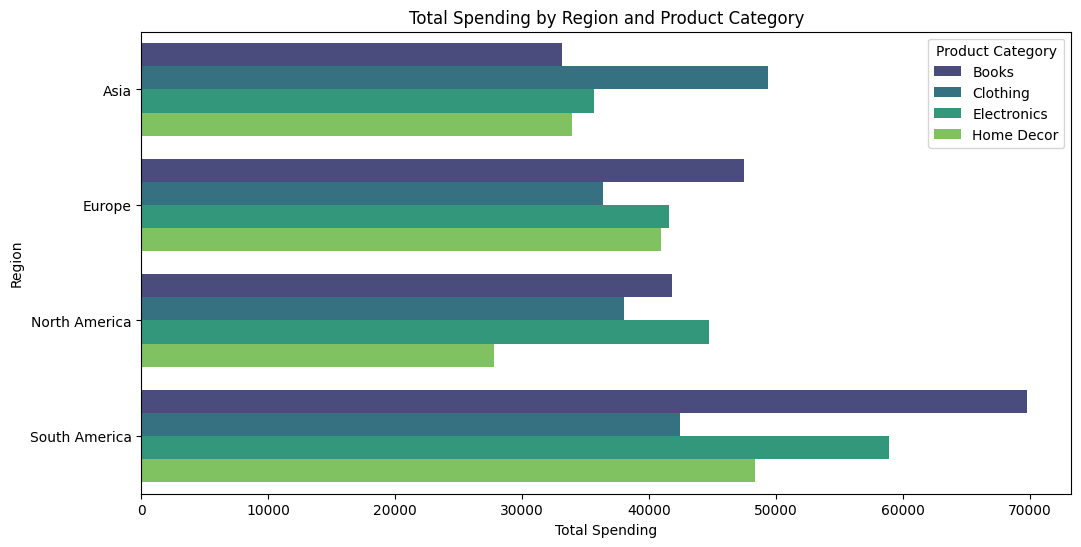

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalValue', y='Region', hue='Category', data=region_spending, palette='viridis')
plt.title('Total Spending by Region and Product Category')
plt.xlabel('Total Spending')
plt.ylabel('Region')
plt.legend(title='Product Category')
plt.show()

In [29]:
region_product_preferences = merged_data.groupby(['Region', 'Category'])['TransactionID'].count().reset_index()
region_product_preferences.columns = ['Region', 'Category', 'TransactionCount']
print(region_product_preferences)

           Region     Category  TransactionCount
0            Asia        Books                51
1            Asia     Clothing                58
2            Asia  Electronics                57
3            Asia   Home Decor                52
4          Europe        Books                64
5          Europe     Clothing                47
6          Europe  Electronics                58
7          Europe   Home Decor                65
8   North America        Books                65
9   North America     Clothing                60
10  North America  Electronics                60
11  North America   Home Decor                59
12  South America        Books                90
13  South America     Clothing                63
14  South America  Electronics                79
15  South America   Home Decor                72


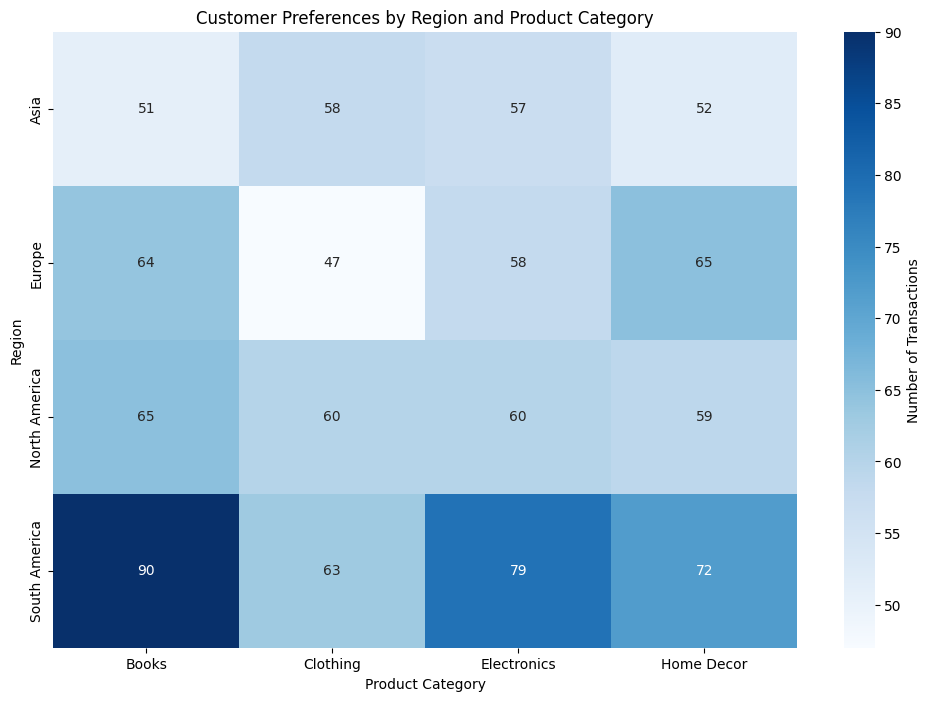

In [31]:
heatmap_data = region_product_preferences.pivot(index='Region', columns='Category', values='TransactionCount').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='Blues', cbar_kws={'label': 'Number of Transactions'})
plt.title('Customer Preferences by Region and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Region')
plt.show()


In [32]:

high_value_threshold = merged_data['TotalValue'].quantile(0.95)
high_value_transactions = merged_data[merged_data['TotalValue'] > high_value_threshold]

print("High-Value Transactions:")
print(high_value_transactions[['TransactionID', 'CustomerName', 'Region', 'ProductName', 'TotalValue']])

High-Value Transactions:
    TransactionID       CustomerName         Region  \
74         T00007    Francisco Young           Asia   
82         T00997       Morgan Perez         Europe   
118        T00012          Lisa Kirk  South America   
119        T00034  Karen Clements MD  South America   
120        T00094          Kevin May  South America   
125        T00482    Catherine White         Europe   
181        T00020       Justin Smith  South America   
182        T00163     Kelsey Roberts           Asia   
262        T00069   Robert Blanchard           Asia   
263        T00193     Lindsey Deleon         Europe   
264        T00420   Elizabeth Nguyen         Europe   
265        T00493      Caitlin Brown  South America   
266        T00587      Juan Mcdaniel  South America   
285        T00287      Juan Mcdaniel  South America   
301        T00106     Wendy Browning  South America   
302        T00149       Nancy Walker           Asia   
306        T00694          Anna Ball  So

In [33]:

region_quantity = merged_data.groupby(['Region', 'Category'])['Quantity'].sum().reset_index()

print(region_quantity)

           Region     Category  Quantity
0            Asia        Books       120
1            Asia     Clothing       166
2            Asia  Electronics       132
3            Asia   Home Decor       142
4          Europe        Books       165
5          Europe     Clothing       119
6          Europe  Electronics       144
7          Europe   Home Decor       167
8   North America        Books       155
9   North America     Clothing       147
10  North America  Electronics       153
11  North America   Home Decor       138
12  South America        Books       241
13  South America     Clothing       158
14  South America  Electronics       198
15  South America   Home Decor       192
